In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [8]:
car_dataset = pd.read_csv('car data.csv')

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
car_dataset.shape

(301, 9)

In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Encoding catogarical data

In [14]:
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [15]:
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [16]:
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [17]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Splitting data into Training data and Test data

In [18]:
x = car_dataset.drop(['Car_Name' , 'Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [19]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [20]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state=2)

#### Model training

In [22]:
lin_reg_model = LinearRegression()

In [23]:
lin_reg_model.fit(x_train , y_train)

LinearRegression()

#### Model evaluation

In [24]:
training_data_prediction = lin_reg_model.predict(x_train)

In [25]:
error_score = metrics.r2_score(y_train,training_data_prediction)

In [26]:
print('R squared Error:' , error_score)

R squared Error: 0.8799451660493701


#### Visualize the actual prices and prediction prices

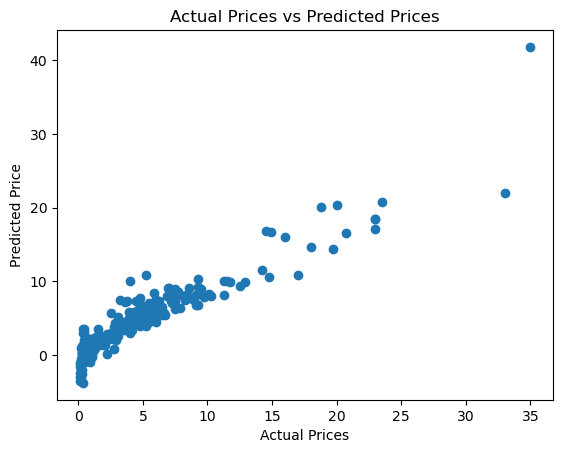

In [27]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

In [28]:
test_data_prediction = lin_reg_model.predict(x_test)

In [34]:
new_car = lin_reg_model.predict([[2015,5.58,24000,0,0,0,0]])

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print(new_car)

[4.26424539]


In [29]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared Error:' , error_score)

R squared Error: 0.836576671502687


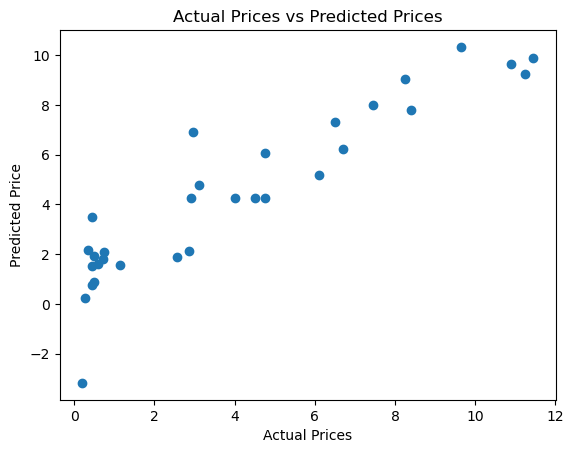

In [30]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## lasso regression

R squared Error: 0.8427856123435794


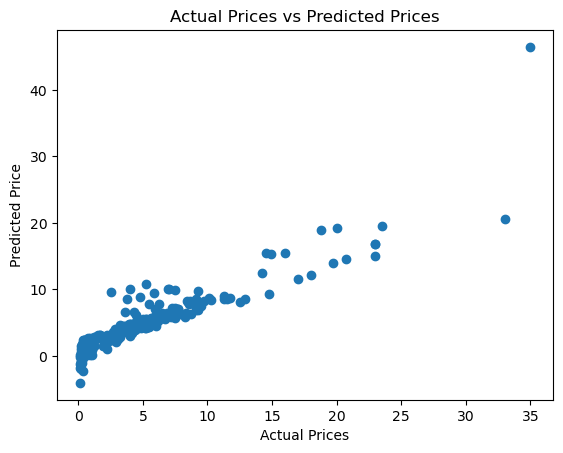

R squared Error: 0.8709167941173195


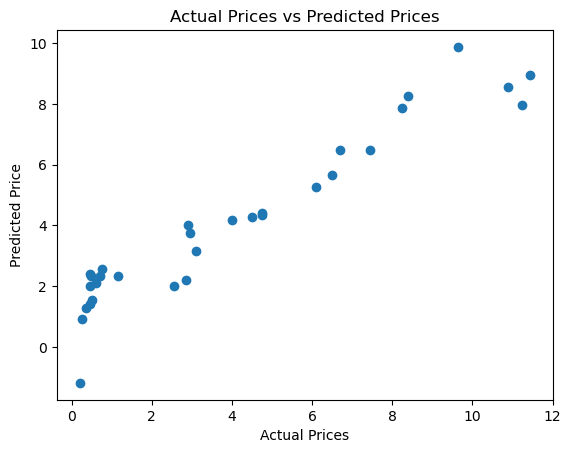

In [31]:
lass_reg_model = Lasso()

lass_reg_model.fit(x_train , y_train)

training_data_prediction = lass_reg_model.predict(x_train)

error_score = metrics.r2_score(y_train,training_data_prediction)

print('R squared Error:' , error_score)

plt.scatter(y_train,training_data_prediction)

plt.xlabel('Actual Prices')

plt.ylabel('Predicted Price')

plt.title('Actual Prices vs Predicted Prices')

plt.show()

test_data_prediction = lass_reg_model.predict(x_test)

error_score = metrics.r2_score(y_test,test_data_prediction)

print('R squared Error:' , error_score)

plt.scatter(y_test,test_data_prediction)

plt.xlabel('Actual Prices')

plt.ylabel('Predicted Price')

plt.title('Actual Prices vs Predicted Prices')

plt.show()



In [32]:
import pickle
with open('lasso_regression_model.pkl', 'wb') as file:
    pickle.dump(lass_reg_model, file)